The necessary libraries are imported

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import keras as keras

The extensions from the libraries are obtained.

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, r2_score
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization

The CSV file is read

In [3]:
df = pd.read_csv("Sales_Data.csv")
df

,Date,Product Name,Product Quantity,Units sold,Day,Month,Year,DayOfWeek,Category,DayType,Rainfall,Week_of_Year
0,2022-01-02,AMBEWELA SET YOGHURT,80ML,6,2,1,2022,Sunday,YOGHURT,Weekend,0.060849,52
1,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
2,2022-01-01,AMBEWELA SET YOGHURT,80ML,1,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
3,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
4,2022-01-02,AMBEWELA SET YOGHURT,80ML,10,2,1,2022,Sunday,YOGHURT,Weekend,0.060849,52
...,...,...,...,...,...,...,...,...,...,...,...,...
34519,2023-10-09,HIGHLAND YOGHURT,80ML,12,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34520,2023-10-09,HIGHLAND YOGHURT,80ML,9,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34521,2023-10-09,HIGHLAND YOGHURT,80ML,13,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34522,2023-10-09,HIGHLAND YOGHURT,80ML,7,9,10,2023,Monday,YOGHURT,Weekday,NaN,41


The file is checked for null values and the total number of null values for each column is displayed.

In [4]:
df.isnull().sum()

Date                   0
Product Name           0
Product Quantity       0
Units sold             0
Day                    0
Month                  0
Year                   0
DayOfWeek              0
Category               0
DayType                0
Rainfall            2103
Week_of_Year           0
dtype: int64

Any existing null values are dropped.

In [5]:
df.dropna(inplace = True)

A plot is drawn to show the number of products sold for each category.

The plot shows that yoghurt has been sold the most by a large margin wheread butter is the least sold product category.

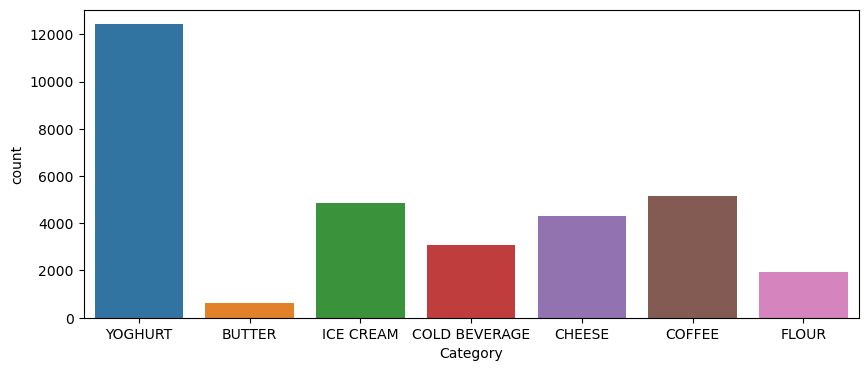

In [6]:
plt.figure(figsize= (10,4))
sns.countplot(x= "Category", data = df)
plt.show()

A frequency density is plotted to show the variation of rainfall.

C:\Users\arkha\AppData\Local\Temp\ipykernel_15016\2174479189.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rainfall'])


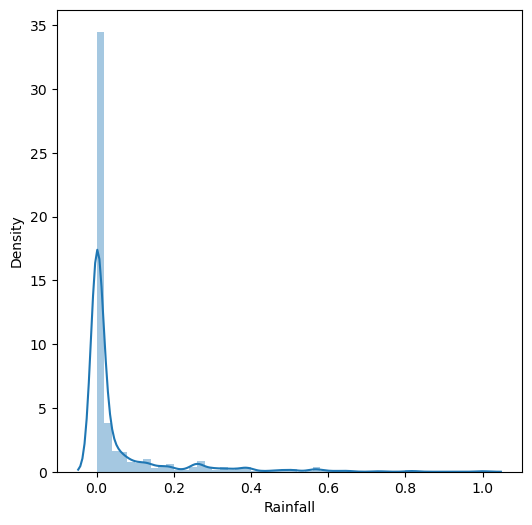

In [7]:
plt.figure(figsize=(6,6))
sns.distplot(df['Rainfall'])
plt.show()

The dataset is again printed after the null values have been removed.

In [8]:
df

,Date,Product Name,Product Quantity,Units sold,Day,Month,Year,DayOfWeek,Category,DayType,Rainfall,Week_of_Year
0,2022-01-02,AMBEWELA SET YOGHURT,80ML,6,2,1,2022,Sunday,YOGHURT,Weekend,0.060849,52
1,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
2,2022-01-01,AMBEWELA SET YOGHURT,80ML,1,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
3,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
4,2022-01-02,AMBEWELA SET YOGHURT,80ML,10,2,1,2022,Sunday,YOGHURT,Weekend,0.060849,52
...,...,...,...,...,...,...,...,...,...,...,...,...
34202,2023-09-30,HIGHLAND YOGHURT,80ML,34,30,9,2023,Saturday,YOGHURT,Weekend,0.236990,39
34203,2023-09-30,HIGHLAND YOGHURT,80ML,6,30,9,2023,Saturday,YOGHURT,Weekend,0.236990,39
34233,2023-09-24,HIGHLAND YOGHURT,80ML,69,24,9,2023,Sunday,YOGHURT,Weekend,0.024019,38
34234,2023-09-25,HIGHLAND YOGHURT,80ML,10,25,9,2023,Monday,YOGHURT,Weekday,0.036829,39


The description of the dataset is provided which includes the mean, standard deviation and the percentiles.

In [9]:
df.describe()

,Units sold,Day,Month,Year,Rainfall,Week_of_Year
count,32421.000000,32421.000000,32421.000000,32421.000000,32421.000000,32421.000000
mean,11.505907,16.052127,5.944511,2022.433916,0.054823,24.078653
std,38.923630,8.886761,3.218504,0.495621,0.126682,14.078479
min,0.000000,1.000000,1.000000,2022.000000,0.000000,1.000000
25%,1.000000,8.000000,3.000000,2022.000000,0.000000,12.000000
50%,3.000000,16.000000,6.000000,2022.000000,0.000000,24.000000
75%,9.000000,24.000000,8.000000,2023.000000,0.032826,35.000000
max,2875.000000,31.000000,12.000000,2023.000000,1.000000,52.000000


The Label Encoder from the sklearn library is used to convert the days of the week and the day type into numerical values to be used as a feature. This is done because random forest classifier model requires numerical inputs.

In [10]:
label_encoder = LabelEncoder()
df["DayOfWeek"] = label_encoder.fit_transform(df["DayOfWeek"])
df["DayType"] = label_encoder.fit_transform(df["DayType"])
df["Category"] = label_encoder.fit_transform(df["Category"])

The input variables are declared in an array and the output variable is the category (what is being predicted).

In [11]:
input_variables = ["Day", "Month", "Year", "DayOfWeek", "DayType", "Rainfall", "Week_of_Year"]
target_variable = "Category"

Separate data frames containing only the input variables or output variable is created.

In [12]:
x = df[input_variables]
y = df[target_variable]

Two instances of Standard Scaler are created.

In [13]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(np.array(y).reshape(-1,1))

The data set is split into 75% training data and 25% testing data.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

A Sequential model is created.

In [15]:
model = Sequential()

The input layer of the model is defined as Dense and has the relu activation function.

In [16]:
model.add(Dense(128, kernel_initializer="normal", input_shape = (x_train.shape[1],), activation = "relu"))

The hidden layers of the model are created.

BatchNormalization is used to ensure a mean close to 0 and a standard deviation close to 1. 
Dropout layer is used to prevent overfitting as randomly removes values. In this model 30% of the values are randomly removed.

In [17]:
model.add(Dense(256, kernel_initializer="normal", activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(256, kernel_initializer="normal", activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(256, kernel_initializer="normal", activation = "relu"))

The output layer of the ANN is defined and has an activation function linear.

In [18]:
model.add(Dense(1, kernel_initializer="normal", activation="linear"))

The model is compiled by specifying the optimizer, the function of loss and the metric to be monitored. Finally, a summary of the structure of the model is printed.

In [19]:
model.compile(optimizer="adam", loss="mean_absolute_error", metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                       

The model is trained with the training dataset. 

The number of epochs have been set to 10 to show that the model runs over the dataset 10 times.
The batch size defines the number of samples being used in each run of the dataset.
Validation split of 20% is used to monitor the metrics and the performance of the model.

In [20]:
model.fit(x_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10


1216/1216 [==============================] - 7s 5ms/step - loss: 0.8940 - accuracy: 0.0000e+00 - val_loss: 0.8887 - val_accuracy: 0.0000e+00
Epoch 2/10
1216/1216 [==============================] - 4s 4ms/step - loss: 0.8858 - accuracy: 0.0000e+00 - val_loss: 0.8944 - val_accuracy: 0.0000e+00
Epoch 3/10
1216/1216 [==============================] - 4s 3ms/step - loss: 0.8837 - accuracy: 0.0000e+00 - val_loss: 0.8838 - val_accuracy: 0.0000e+00
Epoch 4/10
1216/1216 [==============================] - 5s 4ms/step - loss: 0.8821 - accuracy: 0.0000e+00 - val_loss: 0.8877 - val_accuracy: 0.0000e+00
Epoch 5/10
1216/1216 [==============================] - 6s 5ms/step - loss: 0.8817 - accuracy: 0.0000e+00 - val_loss: 0.8830 - val_accuracy: 0.0000e+00
Epoch 6/10
1216/1216 [==============================] - 7s 6ms/step - loss: 0.8800 - accuracy: 0.0000e+00 - val_loss: 0.8820 - val_accuracy: 0.0000e+00
Epoch 7/10
1216/1216 [==============================] - 6s 5ms/step - loss: 0.8796 - a

After training, the model undergoes testing to predict the output value with the use of the input testing data.

In [21]:
prediction = model.predict(x_test)
prediction

254/254 [==============================] - 1s 2ms/step


array([[0.502471  ],
       [0.49150795],
       [0.5013044 ],
       ...,
       [0.4981096 ],
       [0.49686065],
       [0.50141114]], dtype=float32)

The accuracy score is derived by comparing the predicted output values and the original output values.

In [22]:
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy of the model is: {accuracy_score}")

ValueError: continuous is not supported

The r2 score for the model is printed.

In [23]:
r2_score_value = r2_score(y_test, prediction)
print(f"r2 score for the model is: {-r2_score_value}")

r2 score for the model is: 0.22411617050181798


A classification report is provided on the two variables.

In [24]:
print(classification_report(y_test, prediction))

ValueError: continuous is not supported